# Preprocessing


In [89]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt             
%matplotlib inline     
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

In [90]:
df= pd.read_csv('/content/dataset_f.csv')
df.head()

,Unnamed: 0,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
0,1,STUDENT1,2,2,3,3,1,2,2,1,...,1,1,3,2,1,2,1,1,1,1
1,2,STUDENT2,2,2,3,3,1,2,2,1,...,1,1,3,2,3,2,2,3,1,1
2,3,STUDENT3,2,2,2,3,2,2,2,2,...,1,1,2,2,1,1,2,2,1,1
3,4,STUDENT4,1,1,1,3,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,5,STUDENT5,2,2,1,3,2,2,1,3,...,2,1,2,2,2,1,2,2,1,1


In [91]:
# Drop first column of dataframe using iloc[]
df2 = df.iloc[: , 1:]
# print(df2)

# select all columns
# except the first column
df2 = df[df.columns[1:]]
df2.head()

,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [92]:
df2.describe()

,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,Accommodation type,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       145 non-null    object
 1   Age                      145 non-null    int64 
 2   Gender                   145 non-null    int64 
 3   HS Type                  145 non-null    int64 
 4   Scholarship Type         145 non-null    int64 
 5   Working                  145 non-null    int64 
 6   Extra-curricular         145 non-null    int64 
 7   Romantic relationship    145 non-null    int64 
 8   Salary                   145 non-null    int64 
 9   Transpotation mode       145 non-null    int64 
 10  Accommodation type       145 non-null    int64 
 11  Mother_edu               145 non-null    int64 
 12  Father_edu               145 non-null    int64 
 13  Siblings                 145 non-null    int64 
 14  Parental_status          145 non-null    i

In [94]:
df2.shape

(145, 33)

In [95]:
sum(df2.duplicated())

0

No Duplicates


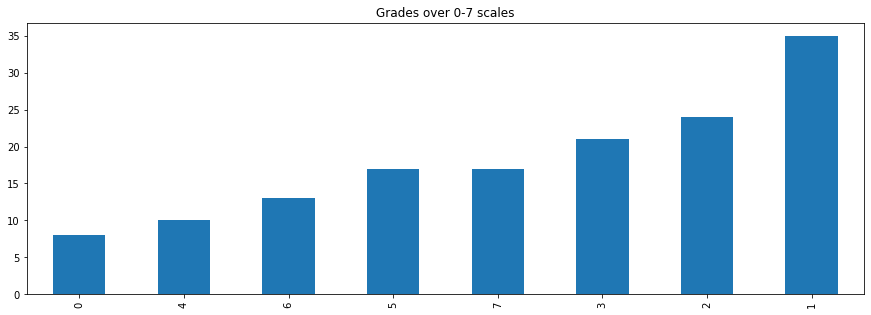

In [96]:
df2['Grade'].value_counts().sort_values().plot(kind="bar", title="Grades over 0-7 scales", figsize=(15,5))
plt.show()

In [97]:
df2.loc[df2['Grade']<3]

,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,STUDENT137,1,1,2,3,1,1,1,1,2,...,3,1,3,2,2,1,2,2,9,0
137,STUDENT138,1,1,1,5,2,1,2,1,1,...,1,1,3,1,3,1,2,4,9,2
138,STUDENT139,1,1,2,4,1,1,1,5,2,...,2,1,3,2,3,1,1,3,9,0
139,STUDENT140,1,1,2,4,1,2,1,2,2,...,2,1,2,3,2,1,1,2,9,0


In [98]:
df2["Grade_categorized"] = 1
df2.loc[df2["Grade"] < 3, "Grade_categorized"] = 0
df2

,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,...,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade,Grade_categorized
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,1


In [99]:
df2=df2.drop(["ID","Grade","Gender","Age","Course ID"],axis = 1)
df2

,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,Accommodation type,Mother_edu,Father_edu,...,Attendance,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Grade_categorized
0,3,3,1,2,2,1,1,1,1,2,...,1,1,1,3,2,1,2,1,1,0
1,3,3,1,2,2,1,1,1,2,3,...,1,1,1,3,2,3,2,2,3,0
2,2,3,2,2,2,2,4,2,2,2,...,1,1,1,2,2,1,1,2,2,0
3,1,3,1,2,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,0
4,1,3,2,2,1,3,1,4,3,3,...,1,2,1,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,3,1,1,2,1,1,2,1,2,...,1,1,1,2,1,2,1,3,3,1
141,2,4,2,2,2,1,4,2,1,1,...,2,1,1,3,2,2,1,5,3,1
142,1,4,2,2,2,1,1,1,3,4,...,1,1,1,3,3,2,1,4,3,0
143,2,4,1,1,1,5,2,3,4,4,...,1,2,1,2,1,2,1,5,3,1


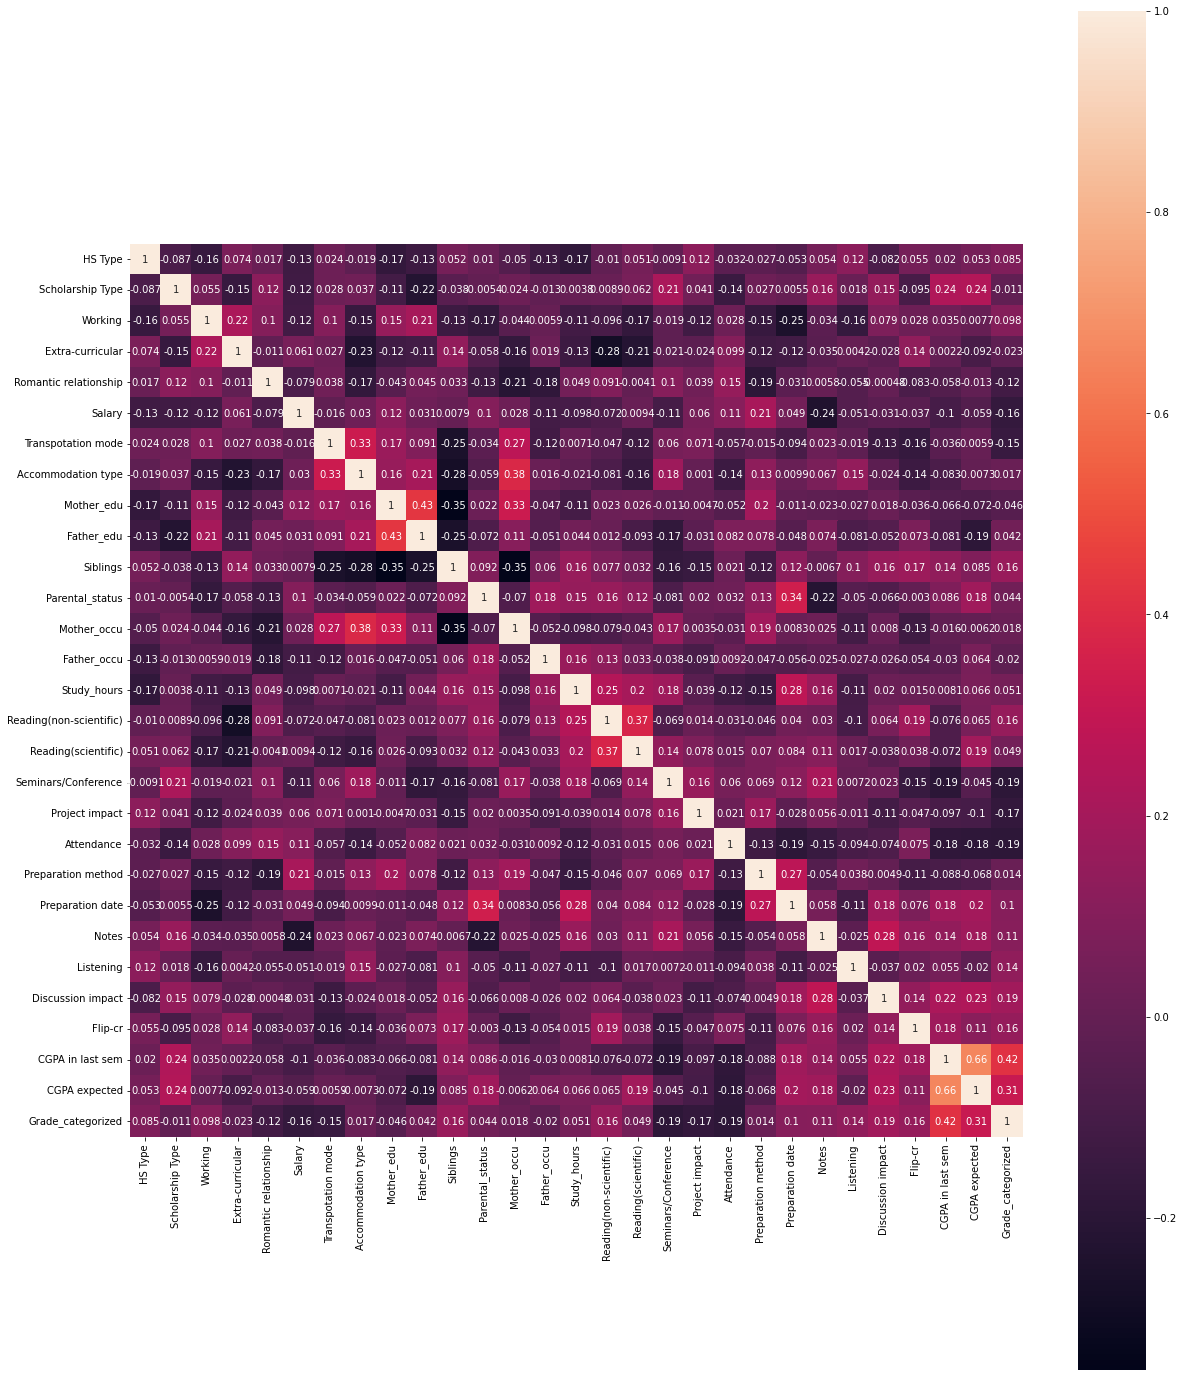

In [100]:
corr= df2.corr()
fig,ax= plt.subplots(figsize=(20,25))
sns.heatmap(corr,annot=True, square=True,ax=ax)
plt.yticks(rotation=360)
plt.show()

In [101]:
df2 = df2.drop(['Scholarship Type', 'Extra-curricular', 'Accommodation type', 'Mother_edu', 'Father_edu', 'Parental_status', 'Mother_occu', 'Father_occu', 'Study_hours', 'Reading(scientific)', 'Preparation method'],axis= 1)

In [103]:
df2 = df2.drop(['HS Type'],axis = 1) 

In [104]:
df2

,Working,Romantic relationship,Salary,Transpotation mode,Siblings,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Grade_categorized
0,1,2,1,1,3,2,1,1,1,1,3,2,1,2,1,1,0
1,1,2,1,1,2,2,1,1,1,1,3,2,3,2,2,3,0
2,2,2,2,4,2,1,1,1,1,1,2,2,1,1,2,2,0
3,1,1,2,1,5,1,1,1,1,2,3,2,2,1,3,2,0
4,2,1,3,1,2,1,1,1,1,1,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,2,1,1,2,3,1,1,1,1,2,1,2,1,3,3,1
141,2,2,1,4,5,2,2,1,2,1,3,2,2,1,5,3,1
142,2,2,1,1,4,2,1,1,1,1,3,3,2,1,4,3,0
143,1,1,5,2,1,2,1,1,1,1,2,1,2,1,5,3,1


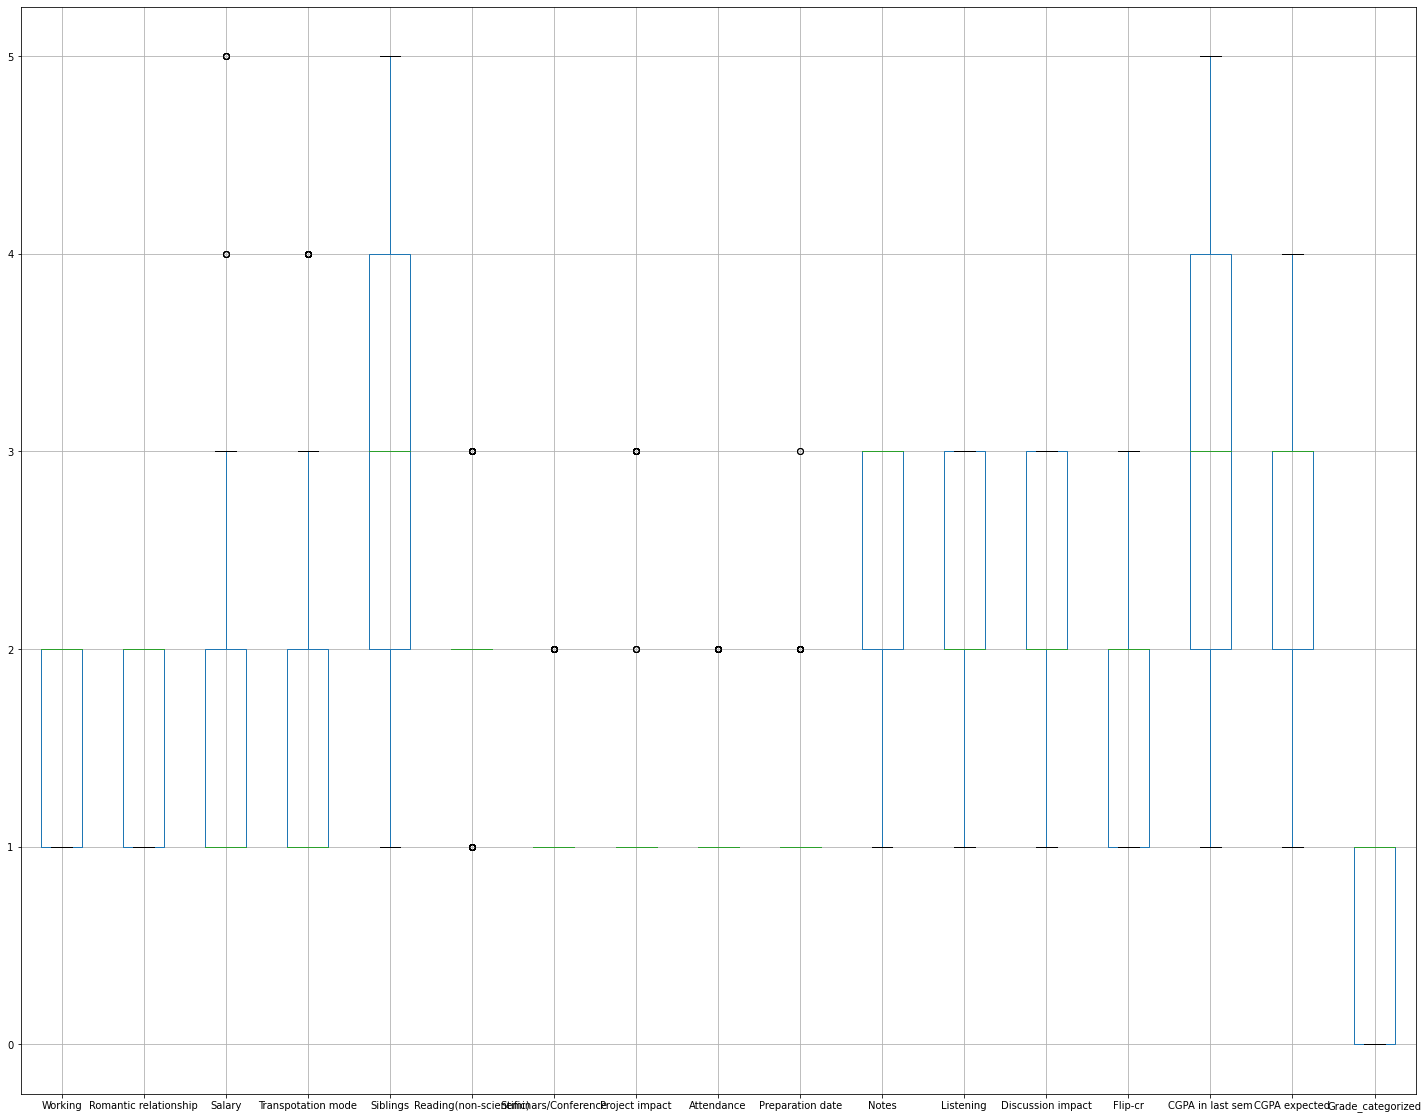

In [105]:
df2.boxplot(figsize=(25,20))

# Clustering

# Classification